In [7]:
import pickle
with open('C:\\Users\\nsuguru\\Downloads\\data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
Y = data[:, -1]
print(X.shape, Y.shape)

(506, 6)
(506, 5) (506,)


In [8]:
def forward_propagation(x,y,w):
        exp_value=math.exp(pow((w[0]*x[0]+w[1]*x[1]),2)+w[5])
        #print(exp_value)
        tanh_value=np.tanh(exp_value+w[6])
        #print(tanh_value)
        sigmoid_value=(1/(1+math.exp((-math.sin(w[2]*x[2]))*(w[3]*x[3]+w[4]*x[4])+w[7])))
        y_dash=tanh_value+(sigmoid_value*w[8])
        dloss=y_dash-y
        return dloss,y_dash,exp_value,tanh_value,sigmoid_value

In [9]:
def backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,x,w):
        dw=[]
        dw.append((dloss)*(1-pow(tanh_value,2))*(exp_value)*((2*w[0]*x[0]*x[0])+(2*w[1]*x[0]*x[1])))
        dw.append((dloss)*(1-pow(tanh_value,2))*(exp_value)*((2*w[1]*x[1]*x[1])+(2*w[0]*x[0]*x[1])))
        dw.append((dloss)*(sigmoid_value*(1-sigmoid_value))*(w[3]*x[3]+w[4]*x[4])*(math.cos(w[2]*x[2]))*x[2]*w[8])
        dw.append((dloss)*(sigmoid_value*(1-sigmoid_value))*(x[3]*(math.sin(w[2]*x[2])))*w[8])
        dw.append((dloss)*(sigmoid_value*(1-sigmoid_value))*(x[4]*(math.sin(w[2]*x[2])))*w[8])
        dw.append((dloss)*(1-pow(tanh_value,2))*(exp_value))
        dw.append((dloss)*(1-pow(tanh_value,2)))
        dw.append((dloss)*sigmoid_value*(1-sigmoid_value)*(-w[8]))
        dw.append((dloss)*sigmoid_value)
        return dw

In [10]:

from tqdm import tqdm
import numpy as np
import math as math
weights=np.random.normal(0, 0.1, size=(9))
dw_approx=[]
gradient_check=[]
learning_rate=0.2
dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[0],weights)
print('dw values:',dw,'\n')
ep=0.0001
for i in range(len(weights)):
    weights[i]=weights[i]+ep
    dloss,y_dash_plus,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
    f_plus=(Y[0]-y_dash_plus)*(Y[0]-y_dash_plus)/2
    
    weights[i]=weights[i]-(2*ep)
    dloss,y_dash_minus,exp_value,tanh_value,sigmoid_value=forward_propagation(X[0],Y[0],weights)
    f_minus=(Y[0]-y_dash_minus)*(Y[0]-y_dash_minus)/2
    dw_approx.append((f_plus-f_minus)/(ep*2))
    gradient_check.append((dw[i]-dw_approx[i])/(dw[i]+dw_approx[i]))
    weights[i]=weights[i]+ep
print('dw_approx:',dw_approx,'\n')
print('gradient_check: ',gradient_check)

dw values: [0.111890383777984, 0.010426468014851788, -0.0006604601689183413, -0.0007658890235404396, -0.0001656963522238809, -0.5319017796474333, -0.479831753809958, -0.03158166769370096, -0.5391791256934588] 

dw_approx: [0.11189038173375909, 0.010426468013413626, -0.0006604601671122978, -0.0007658890233130933, -0.00016569635330476729, -0.5319017784022328, -0.47983175633536934, -0.03158166766659143, -0.5391791256925682] 

gradient_check:  [9.13494468422702e-09, 6.896688732312508e-11, 1.3672614753834794e-09, 1.4841990588354742e-10, -3.2616480871604637e-09, 1.1705173279835672e-09, -2.631559184867848e-09, 4.2919725096955574e-10, 8.259044795267015e-13]


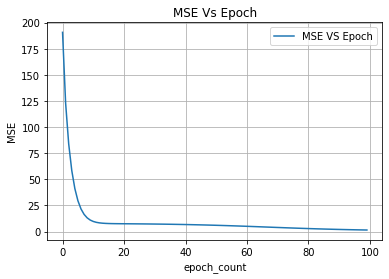

In [47]:
#Vanilla Update
weights=np.random.normal(0, 0.1, size=(9))
learning_rate=0.001
loss=0
epoch=100
epoch_count=[]
MSE=[]
for j in (range(epoch)):
    loss=0
    for i in range(len(X)):
        dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[i],Y[i],weights)
        dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[i],weights)
        loss=loss+((Y[i]-y_dash)*(Y[i]-y_dash))
        for k in range(len(weights)):
            weights[k] = weights[k]-learning_rate*dw[k]
    MSE.append(loss/2)
    epoch_count.append(j)
import matplotlib.pyplot as plt
plt.plot(epoch_count, MSE,label='MSE VS Epoch')
plt.legend()
plt.xlabel("epoch_count")
plt.ylabel("MSE")
plt.title("MSE Vs Epoch")
plt.grid()
plt.show()


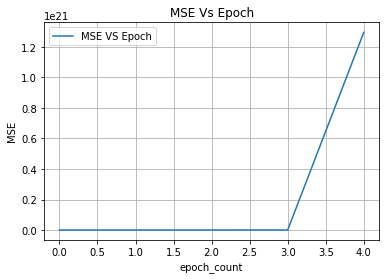

In [49]:
#Momentun Update:
velocity=np.zeros(9,dtype=float)
weights=np.random.normal(0, 0.1, size=(9))
MSE=[]
epoch_count=[]
learning_rate=0.001
gamma=0.9
for j in (range(5)):
    loss=0
    for i in range(len(X)):
        dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[i],Y[i],weights)
        dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[i],weights)
        loss=loss+((Y[i]-y_dash)*(Y[i]-y_dash))
        for k in range(len(weights)):
            velocity[k] = (gamma * velocity[k]) + (learning_rate * dw[k])
            weights[k] = weights[k]+velocity[k]
    MSE.append(loss/2)
    epoch_count.append(j)           
            
plt.plot(epoch_count, MSE,label='MSE VS Epoch')
plt.legend()
plt.xlabel("epoch_count")
plt.ylabel("MSE")
plt.title("MSE Vs Epoch")
plt.grid()
plt.show()

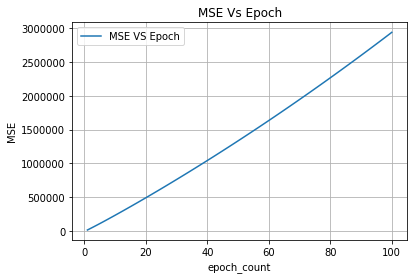

In [50]:
M = np.zeros(9,dtype=float)
R = np.zeros(9,dtype=float)
beta1 = 0.9
beta2 = 0.99
weights=np.random.normal(0, 0.1, size=(9))
learning_rate=0.001
eps=0.0000001
MSE=[]
epoch_count=[]
gamma=0.9
for j in (range(100)):
    j=j+1
    loss=0
    for i in range(len(X)):
        dloss,y_dash,exp_value,tanh_value,sigmoid_value=forward_propagation(X[i],Y[i],weights)
        dw=backward_propagation(dloss,y_dash,exp_value,tanh_value,sigmoid_value,X[i],weights)
        loss=loss+((Y[i]-y_dash)*(Y[i]-y_dash))
        for k in range(len(weights)):
            M[k] =(beta1*M[k])+((1-beta1)*dw[k])
            R[k] = (beta2*R[k])+((1-beta2)*dw[k]**2)
            m_k_hat = M[k]/(1-beta2**(j))
            r_k_hat = R[k] / (1 - beta2**(j))
            weights[k] = weights[k] +(learning_rate * m_k_hat / (np.sqrt(r_k_hat) + eps))
    MSE.append(loss/2)
    epoch_count.append(j)
plt.plot(epoch_count, MSE,label='MSE VS Epoch')
plt.legend()
plt.xlabel("epoch_count")
plt.ylabel("MSE")
plt.title("MSE Vs Epoch")
plt.grid()
plt.show()        